# **РК №1**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
data = pd.read_csv('heart.csv', sep=",")

# **Дата-сет сердечных заболеваний(описание)**


age - age in years (возраст)

sex - (1 = male; 0 = female) (пол)

cp - chest pain type (тип боли в груди)

trestbps - resting blood pressure (in mm Hg on admission to the hospital) (кровяное давление в состоянии покоя)

chol - serum cholestoral in mg/dl (давление холестерина в сыворотке крови)

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) (уровень сахара в крови натощак)

restecg - resting electrocardiographic results (электрокардиографические результаты покоя)

thalach - maximum heart rate achieved (максимальная частота сердечных сокращений)

exang - exercise induced angina (1 = yes; 0 = no) (стенокардия, вызванная физической нагрузкой)

oldpeak - ST depression induced by exercise relative to rest (понижение ST-сегмента на электрокардиограмме, вызванное физ. упражнениями по сравнению с состоянием покоя)

slope - the slope of the peak exercise ST segment (элевация сегмента ST)

ca - number of major vessels (0-3) colored by flourosopy (количество крупных сосудов (0-3), окрашенных по цвету)

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect (результат талиевого стресс-теста)

target - 1 or 0 (целевой признак: наличие или отсутствие сердечного заболевания)

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.shape

(303, 14)

In [0]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [0]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0


In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
# Определим уникальные значения для целевого признака
data['target'].unique()

array([1, 0])

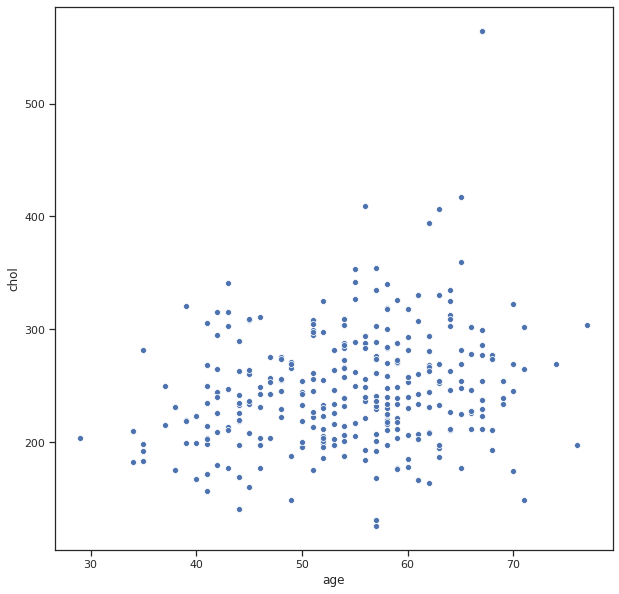

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='chol', data=data)

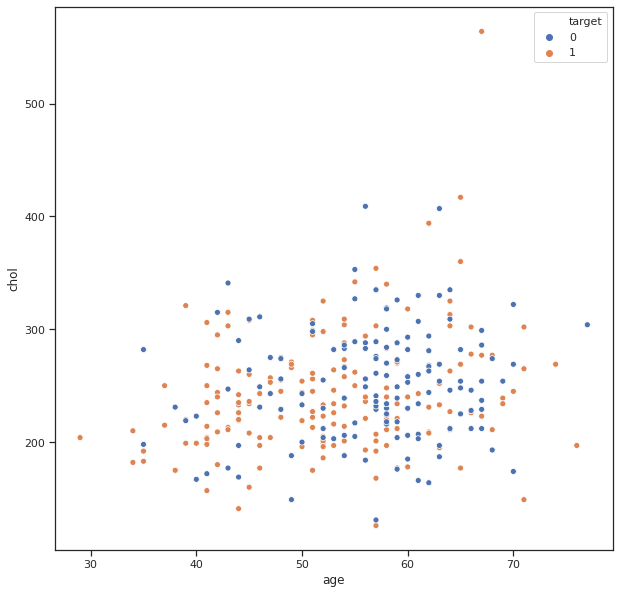

In [0]:

fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='chol', data=data, hue='target')

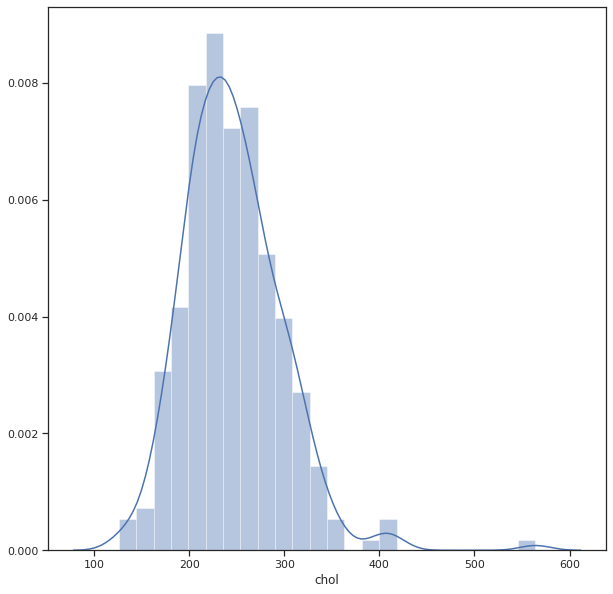

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['chol'])

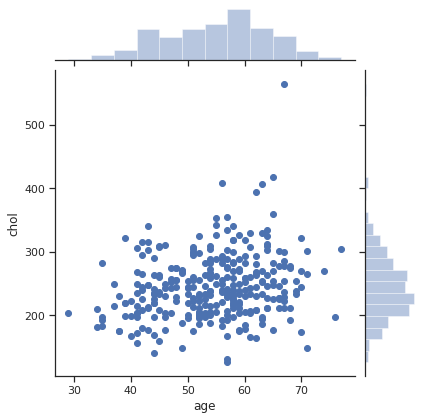

In [0]:
sns.jointplot(x='age', y='chol', data=data)

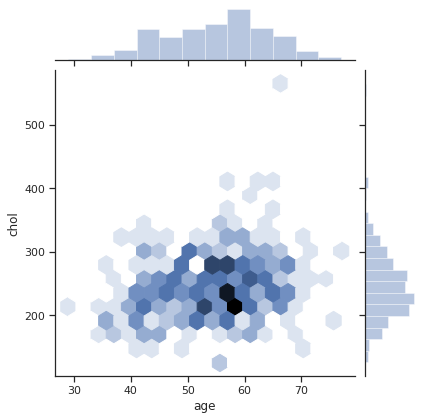

In [0]:
sns.jointplot(x='age', y='chol', data=data, kind="hex")

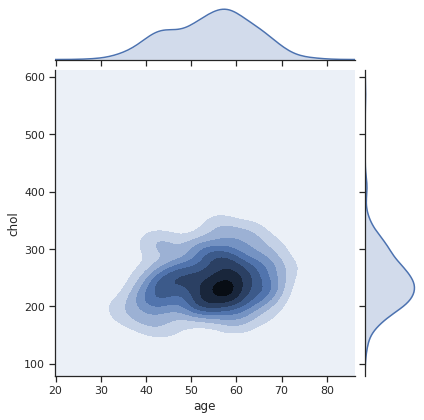

In [0]:
sns.jointplot(x='age', y='chol', data=data, kind="kde")

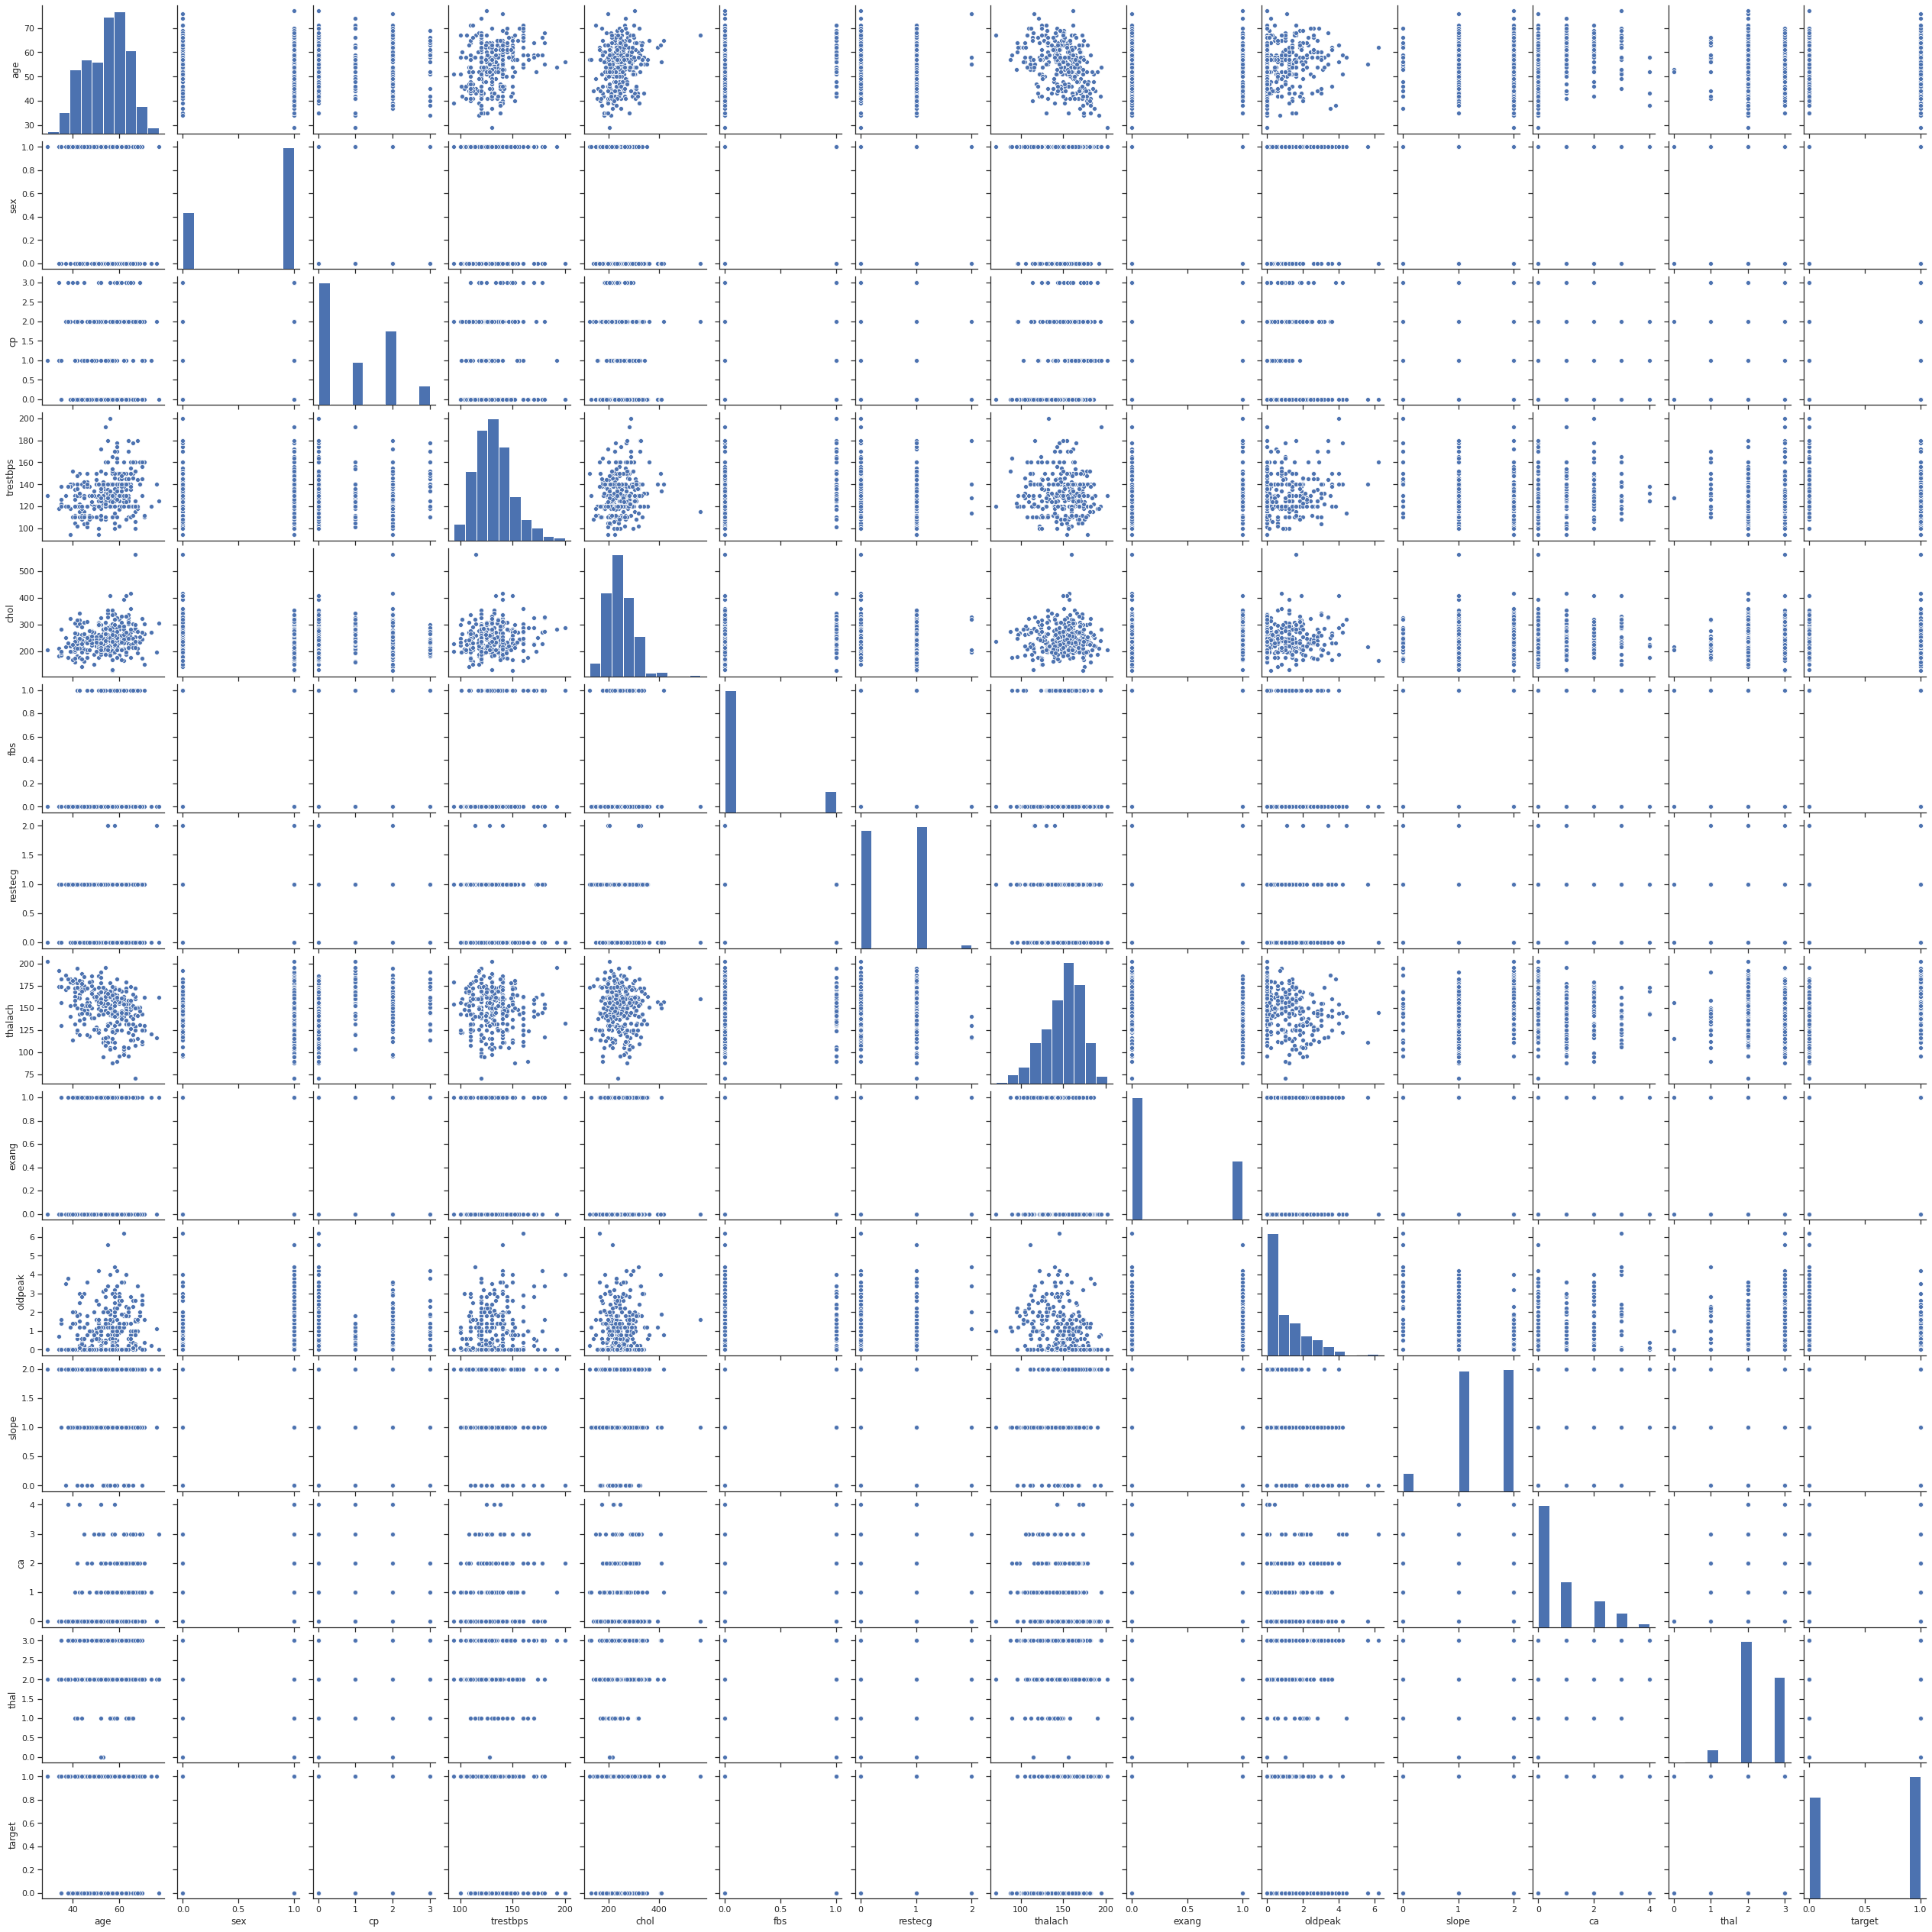

In [0]:
sns.pairplot(data)

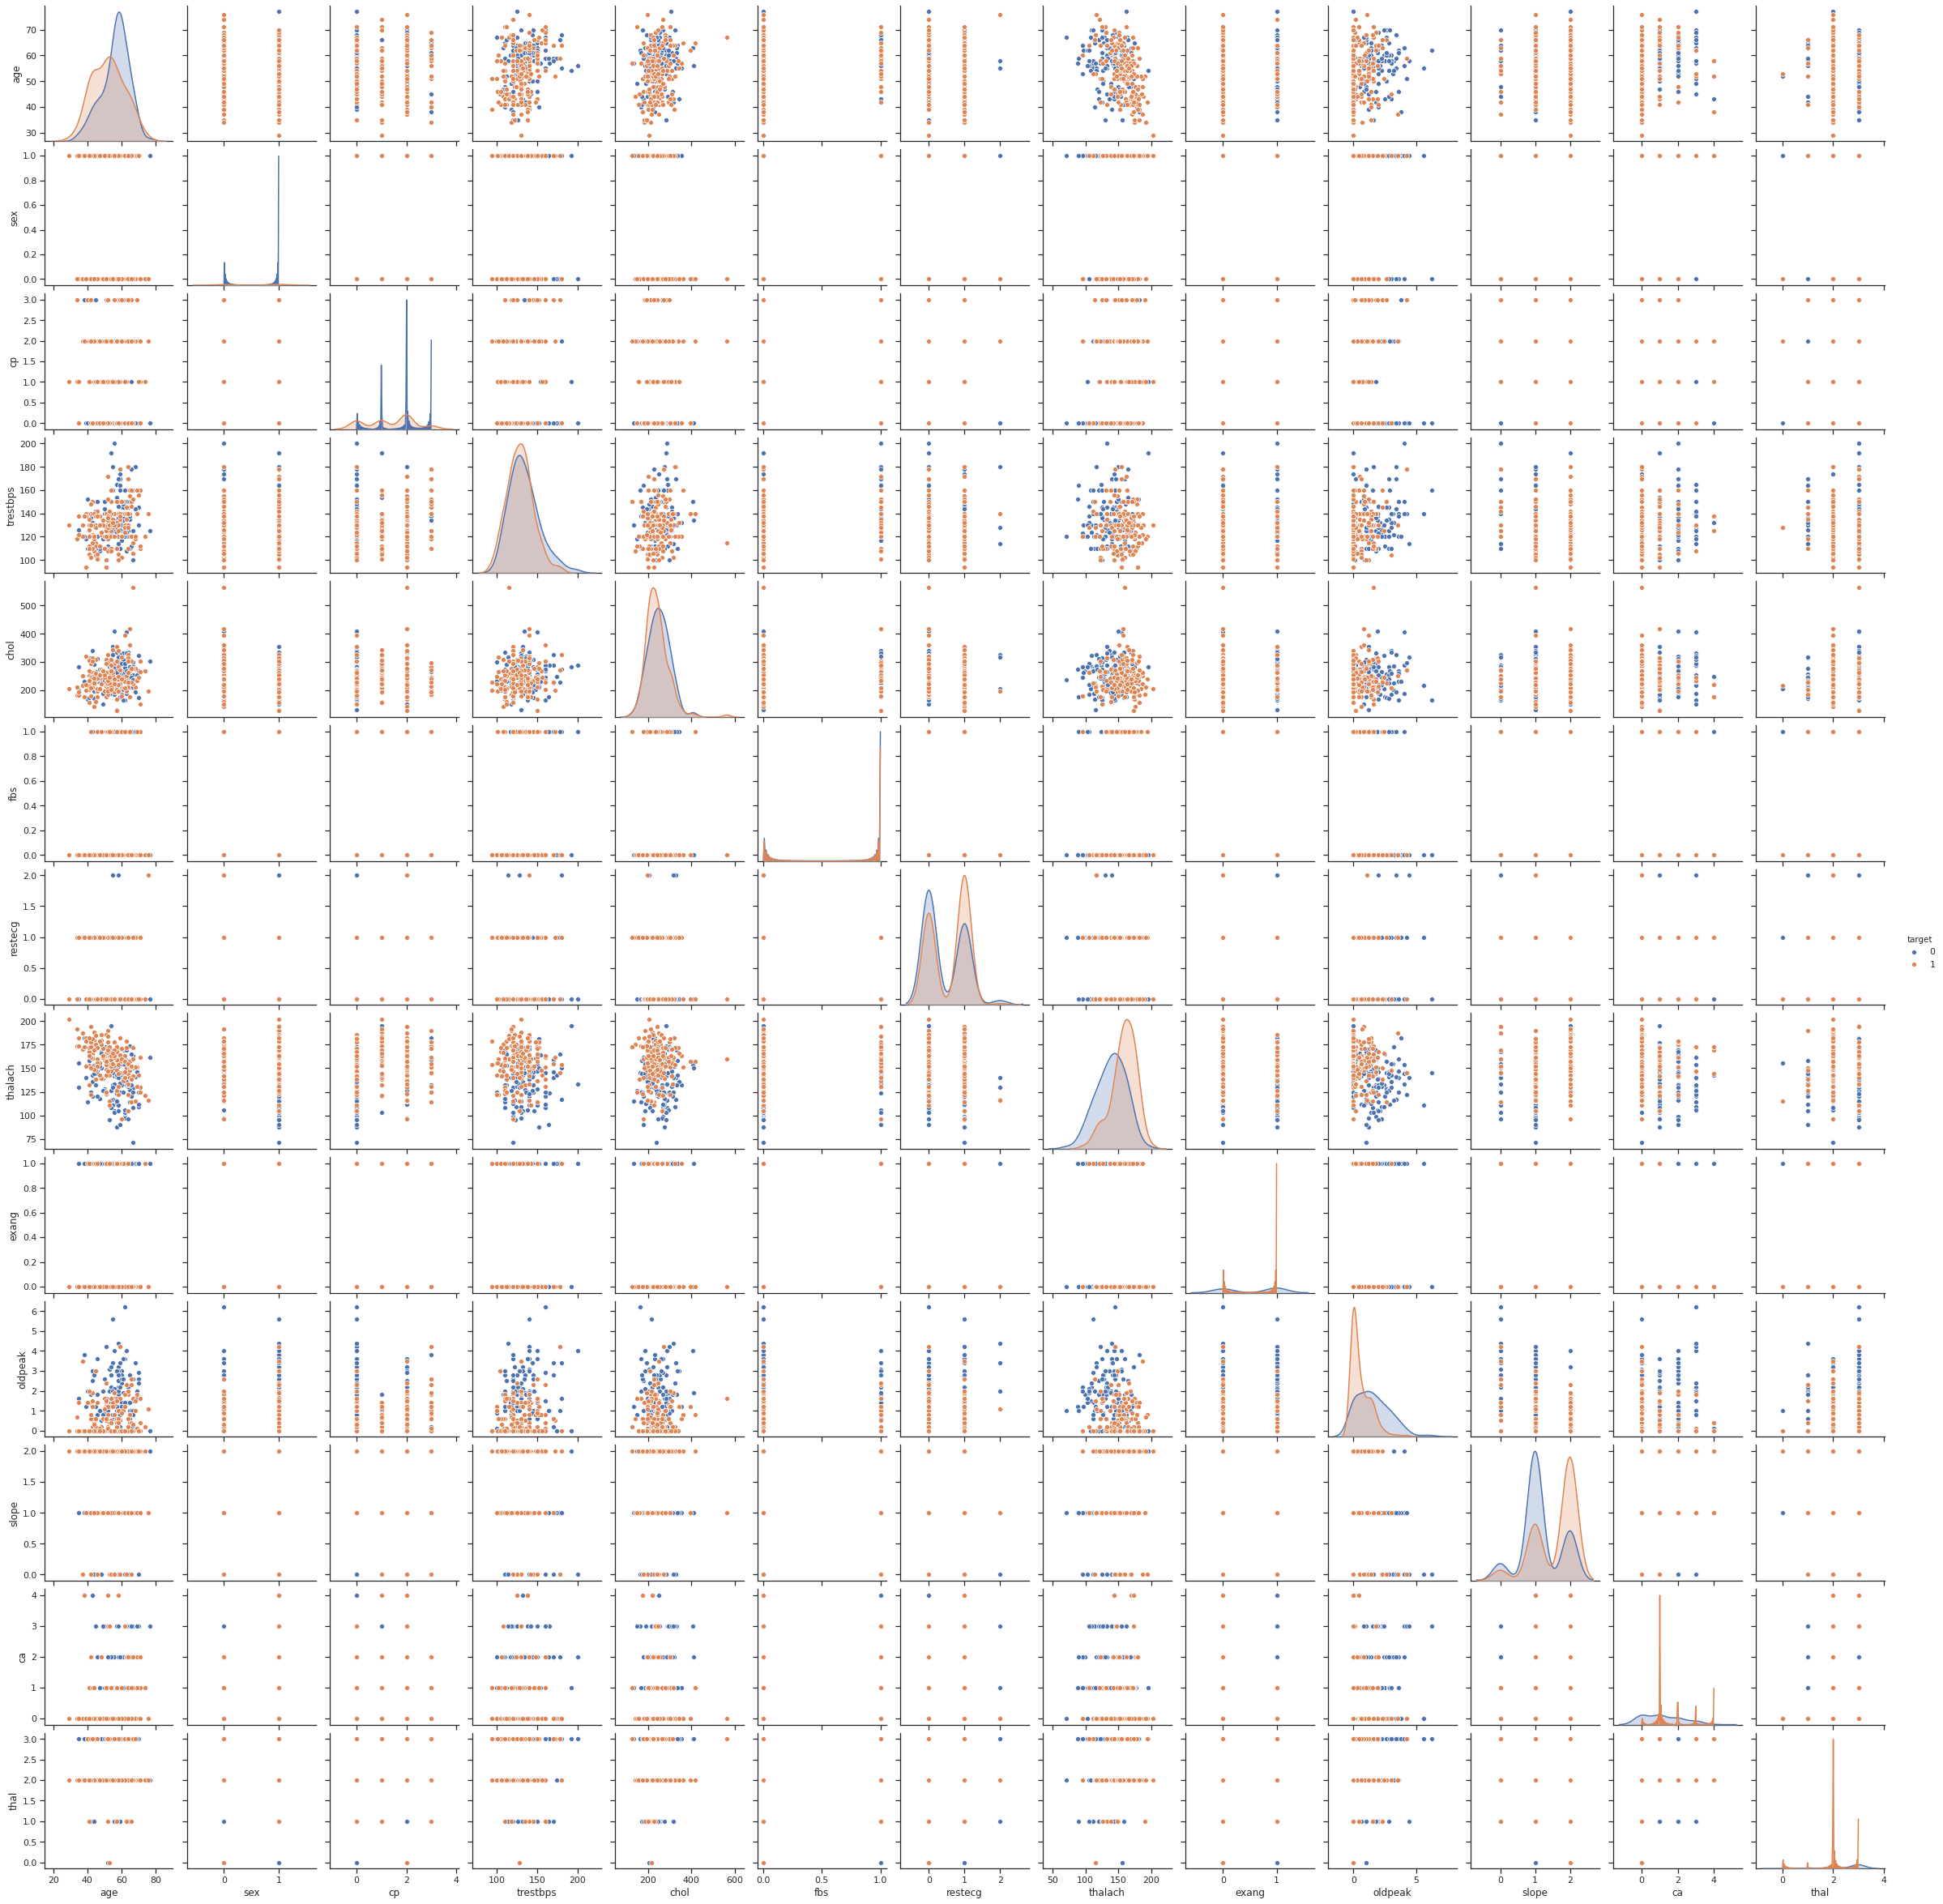

In [0]:
sns.pairplot(data, hue="target")

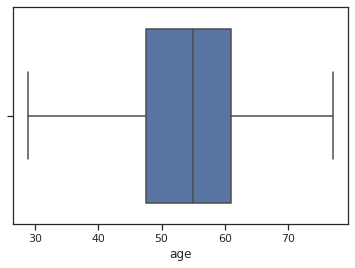

In [0]:
sns.boxplot(x=data['age'])

In [0]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


target отчасти корреллирует с cp, thalach, exang, oldpeak, slope, ca, thal - их оставляем

target слабо корреллирует с age sex, trestbps, chol, fbs, restecg - их исключить

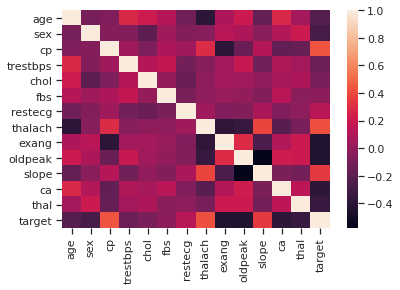

In [0]:
sns.heatmap(data.corr())